In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score 

### Making the Dataset

In [4]:
np.random.seed(42) 
data = {
    'CustomerID': np.arange(1, 101),  
    'Age': np.random.randint(18, 65, size=100),  
    'Average_Spend': np.random.uniform(5, 50, size=100), 
    'Visits_per_Week': np.random.uniform(1, 7, size=100),  
    'Promotion_Interest': np.random.randint(1, 11, size=100)  
}
df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Average_Spend,Visits_per_Week,Promotion_Interest
0,1,56,18.206968,5.266897,2
1,2,46,5.633592,5.857006,9
2,3,32,13.947908,3.091996,8
3,4,60,37.010388,1.577059,10
4,5,25,40.557899,6.643140,7


### Applying K-Means clustering

C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

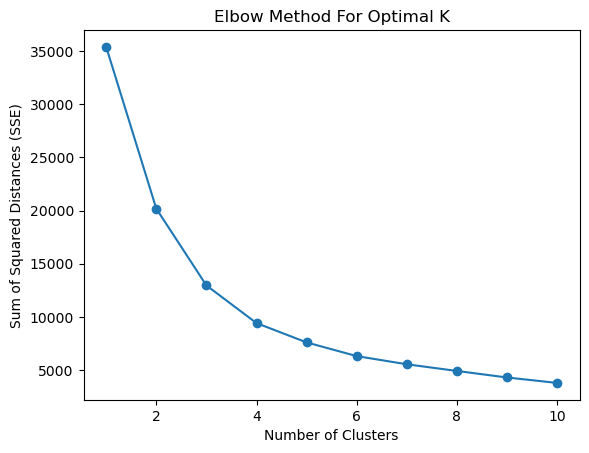

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]
sse = []
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

In [6]:
features = df[['Age', 'Average_Spend', 'Visits_per_Week', 'Promotion_Interest']]
kmeans = KMeans(n_clusters=3, random_state=42)

df['Cluster'] = kmeans.fit_predict(features)

cluster_names = {0: 'Daily', 1: 'Promotion', 2: 'Weekend'}
df['Customer Group'] = df['Cluster'].map(cluster_names)

df.head()

C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Age,Average_Spend,Visits_per_Week,Promotion_Interest,Cluster,Customer Group
0,1,56,18.206968,5.266897,2,1,Promotion
1,2,46,5.633592,5.857006,9,0,Daily
2,3,32,13.947908,3.091996,8,0,Daily
3,4,60,37.010388,1.577059,10,1,Promotion
4,5,25,40.557899,6.643140,7,2,Weekend


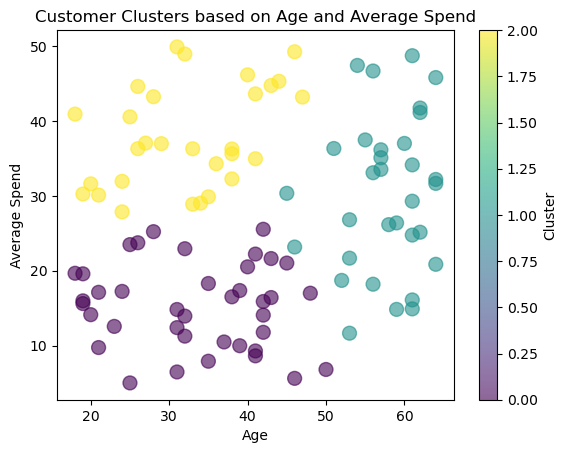

In [7]:
plt.scatter(df['Age'], df['Average_Spend'], c=df['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Average Spend')
plt.title('Customer Clusters based on Age and Average Spend')
plt.colorbar(label='Cluster')
plt.show()

### Evaluating performance

In [8]:
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.39


### Prediction of a new customer

In [10]:
def clustering(age,avg_spend,visit_per_week, promotion_interest):
    new_customer = np.array([[age,avg_spend,visit_per_week, promotion_interest]])
    predicted_cluster = kmeans.predict(new_customer)
    
    if predicted_cluster[0]==0:
        return "Daily"
    elif predicted_cluster[0]==1:
        return "Weekend"
    else:
        return "Promotion"

### Test1

In [13]:
age = 40
avg_spend = 30
visit_per_week= 4
promotion_interest= 7
predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Promotion


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Test2

In [12]:
age = 40
avg_spend = 10
visit_per_week= 1
promotion_interest= 0
predicted_cluster = clustering(age, avg_spend,visit_per_week,promotion_interest)
print(f'New Customer assigned to Cluster: {predicted_cluster}')
df.to_csv('customer_clusters.csv', index=False)

New Customer assigned to Cluster: Daily


C:\Users\gupta\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
